In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# DataSet T1

## Context
In Wind Turbines, Scada Systems measure and save data's like wind speed, wind direction, generated power etc. for 10 minutes intervals. This file was taken from a wind turbine's scada system that is working and generating power in Turkey.

## Content
The data's in the file are:

Date/Time (for 10 minutes intervals)
LV ActivePower (kW): The power generated by the turbine for that moment
Wind Speed (m/s): The wind speed at the hub height of the turbine (the wind speed that turbine use for electricity generation)
TheoreticalPowerCurve (KWh): The theoretical power values that the turbine generates with that wind speed which is given by the turbine manufacturer
Wind Direction (°): The wind direction at the hub height of the turbine (wind turbines turn to this direction automaticly)

In [17]:
data1= pd.read_csv('T1.csv')
df = data1.copy()
df.columns

Index(['Date/Time', 'LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)'],
      dtype='object')

In [18]:
df[['LV ActivePower (kW)','Wind Speed (m/s)','Wind Direction (°)']].corr(method='pearson')

,LV ActivePower (kW),Wind Speed (m/s),Wind Direction (°)
LV ActivePower (kW),1.000000,0.912774,-0.062702
Wind Speed (m/s),0.912774,1.000000,-0.077188
Wind Direction (°),-0.062702,-0.077188,1.000000


In [19]:
df.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


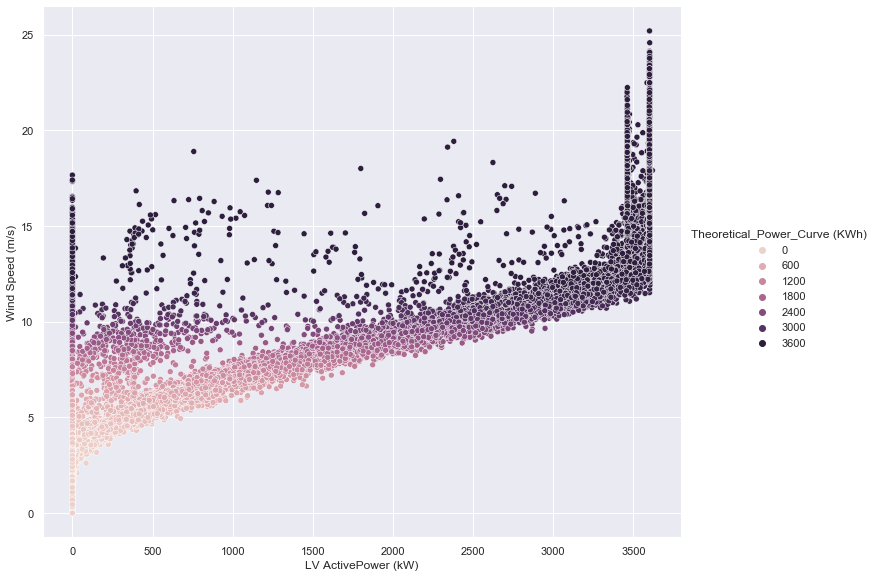

In [21]:
sns.set(style ="darkgrid") 
sns.relplot(x ="LV ActivePower (kW)", y ="Wind Speed (m/s)", hue ='Theoretical_Power_Curve (KWh)', data = df, height=8, aspect=1.2);


On constate que la corrélation entre la vitesse du vent et la génération d'électricité n'est pas forcément vérifiée pour les valeurs extrêmes de LV ActivePower. Tentons d'observer la relation entre les deux filtrant ces valeurs.

In [22]:
df_clean = df[(df['LV ActivePower (kW)']>400) & (df['LV ActivePower (kW)']<3400)]

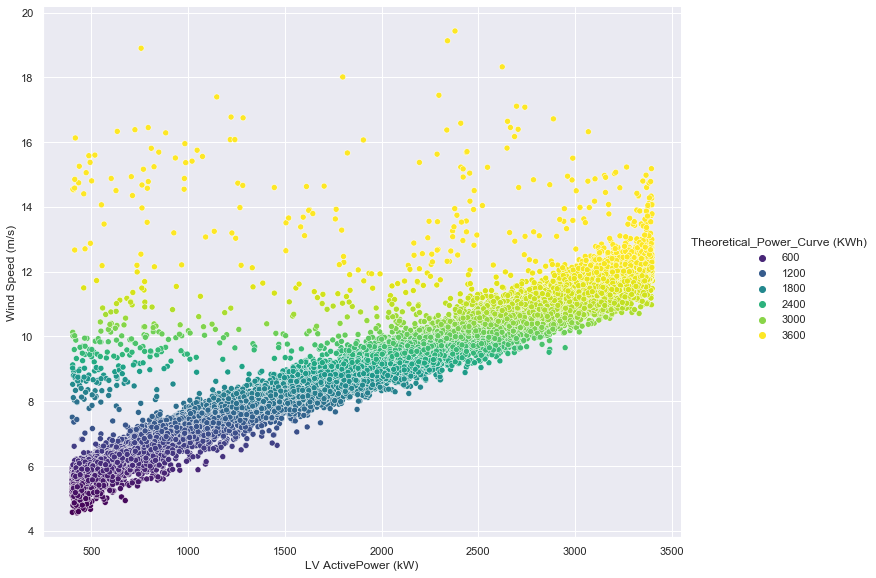

In [8]:
sns.relplot(x ="LV ActivePower (kW)", y ="Wind Speed (m/s)", hue ='Theoretical_Power_Curve (KWh)',
            palette='viridis',
            data = df_clean, height=8, aspect=1.2);


Malgré quelques valeurs aberrantes, le graphique montre la forte corrélation entre la vitesse du vent et la production d'éléctricité par les éoliennes. Cela est par ailleurs confirmé par les valeurs théoriques calculées.

In [23]:
df_clean[['LV ActivePower (kW)','Wind Speed (m/s)','Wind Direction (°)']].corr(method='pearson')

,LV ActivePower (kW),Wind Speed (m/s),Wind Direction (°)
LV ActivePower (kW),1.000000,0.936411,-0.017924
Wind Speed (m/s),0.936411,1.000000,-0.036074
Wind Direction (°),-0.017924,-0.036074,1.000000


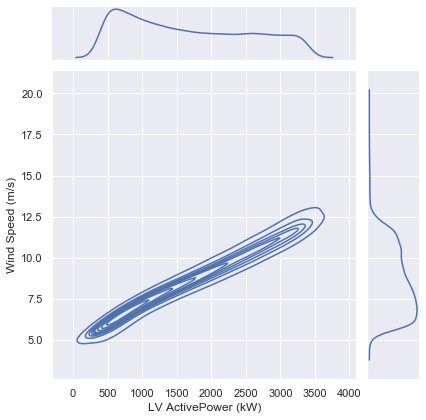

In [10]:
sns.jointplot(x = 'LV ActivePower (kW)', y="Wind Speed (m/s)", data=df_clean, kind = 'kde')

En faisant abstraction des valeurs extrêmes, le coefficient de Pearson pour ces deux variables passe de 0.91 à 0.93.

## DataSet 2 : Turbine_Data

Nous avons vu avec le premier dataset que la génération d'électricité était directement liée à la vitesse du vent. En revanche, nous n'avons pas pu expliquer le manque de corrélation aux extrêmes. Le DataSet n°2, contenant plus de variables, nous permettra peut-être de les expliquer.

In [24]:
df2 = pd.read_csv('Turbine_Data.csv')

In [12]:
df2.dropna(inplace=True)
df2.head()

,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
70789,2019-05-06 14:10:00+00:00,-7.851491,39.308243,47.154927,45.736893,43.699357,43.699357,0.0,58.852307,56.782879,...,62.145290,46.003815,49.171875,44.80,-15.007223,0.672715,2.0,G01,44.80,2.212693
70791,2019-05-06 14:30:00+00:00,-5.565284,39.206277,40.058399,41.260297,41.260230,41.260230,0.0,48.911180,56.033333,...,61.282616,40.253338,44.515622,49.00,-10.851533,0.508198,2.0,G01,49.00,2.130019
70793,2019-05-06 14:50:00+00:00,-5.549332,39.194184,46.500652,39.576077,39.576122,39.576122,0.0,56.859428,55.873937,...,60.362536,46.003815,51.624993,61.50,-10.303578,0.715614,2.0,G01,61.50,2.347810
70794,2019-05-06 15:00:00+00:00,-5.768376,38.992667,46.419196,47.399521,48.299502,48.299502,0.0,56.761226,55.807661,...,59.855694,46.004238,51.900000,93.25,-12.594477,0.550434,129.0,G01,93.25,2.161460
70795,2019-05-06 15:10:00+00:00,-5.091456,38.686212,46.280597,50.363603,50.363691,50.363691,0.0,56.483241,55.451512,...,59.567618,46.007880,52.112507,138.50,-11.181515,0.251628,282.0,G01,138.50,1.913490


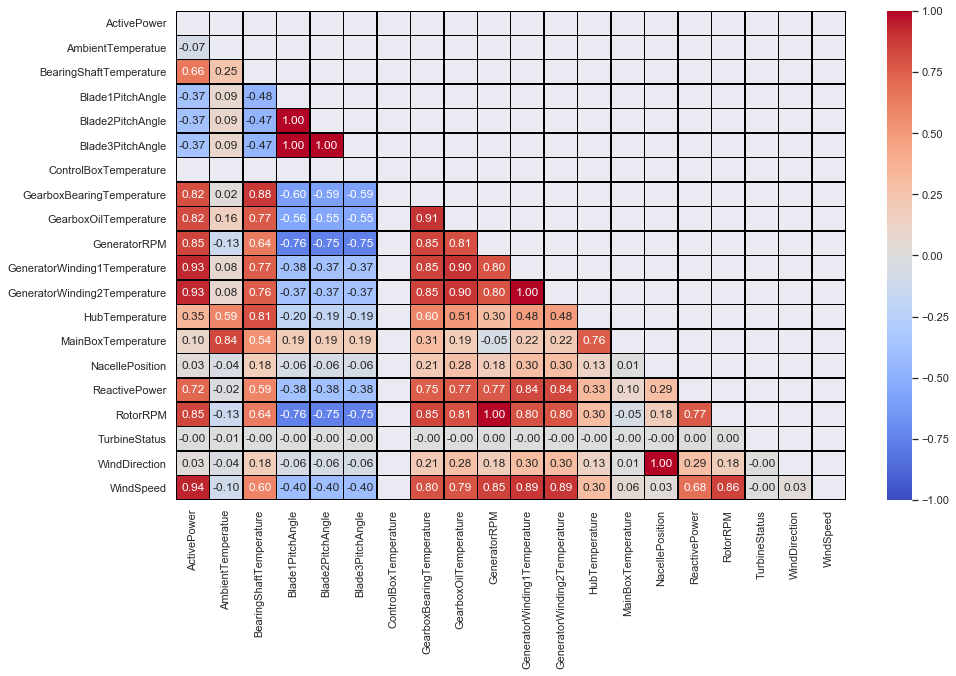

In [25]:
matrix = np.triu(df2.corr())
fig, bx = plt.subplots(figsize=(15,9))  
sns.heatmap(df2.corr(), 
            xticklabels=df2.corr().columns.values,
            yticklabels=df2.corr().columns.values,
           vmin=-1, vmax=1, center= 0,
           cmap= 'coolwarm',
            annot=True,
           linewidths=0.5, linecolor='black',
            mask=matrix,
            ax=bx,
            fmt='.2f'
           );

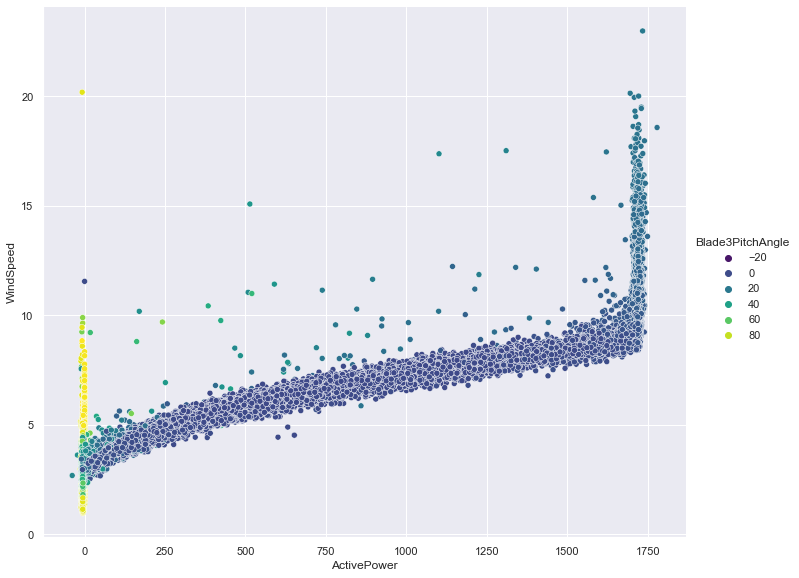

In [14]:
sns.relplot(x ="ActivePower", y ="WindSpeed", hue ='Blade3PitchAngle', 
            palette='viridis', data = df2, height=8, aspect=1.2)

Grâce à ce plot, on remarque que lorsque le pas de la lame est incliné à 80°, l'éolienne génére difficilement de l'électricité.

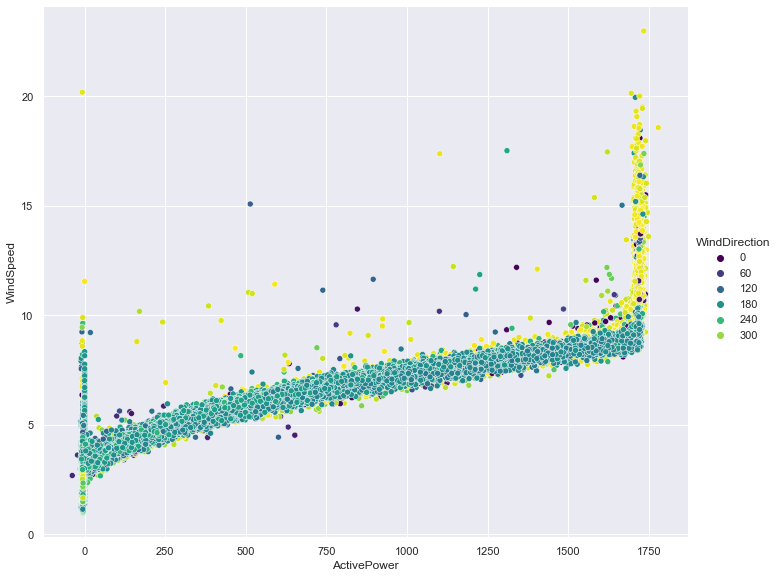

In [15]:
sns.relplot(x ="ActivePower", y ="WindSpeed", 
            hue ='WindDirection',  palette='viridis', 
            data = df2, height=8, aspect=1.2);

Influence de la direction du vent sur la génération d'électricité. 